# Introduction to Circuit and Electronics

![StartPicure](../Circuit_Electronics/CircuitElectronicsImages/startPic.png)

**Significance of Circuit Analysis in Various Engineering Fields**

Circuit analysis is a fundamental skill in many engineering disciplines. It allows engineers to _design_, ***understand***, and **_troubleshoot_** electrical circuits and systems. This analysis is crucial for ensuring the functionality, efficiency, and safety of electronic devices and systems.

**Real-World Applications**
- Electronics
- Communication Systems
- Power Systems

**Note:**
Although machine learning algorithms are used in circuit design to reduce the time and complexity associated with it, achieving the highest possible accuracy in predictions requires a neural network trained with examples using the RC charging equation (see [NN with RC](https://www.researchgate.net/publication/344787842_Mathematical_Modeling_and_Prediction_of_Neural_Network_Training_based_on_RC_Circuits) ).

## Basic Components:

### Sources, Resistors, Capacitors, Inductors, Sources, Transistors, Op-Amps:

- **Resistors**: Components that resist the flow of electric current, creating a voltage drop and dissipating energy as heat.
- **Capacitors**: Devices that store and release electrical energy by accumulating charge on their plates.
- **Inductors**: Coils of wire that store energy in a magnetic field when current passes through them.
- **Sources**: Components that provide electrical power, such as batteries or voltage/current sources.
- **Transistors**: Semiconductor devices used to amplify or switch electronic signals, including Bipolar Junction Transistors (BJT) and Field-Effect Transistors (FET).
- **Op-Amps**: Operational amplifiers are high-gain voltage amplifiers with differential inputs, used in various signal processing applications.


## schemdraw

The schemdraw module allows for drawing circuit elements. 

[schemdraw_source](https://schemdraw.readthedocs.io/en/stable/#)

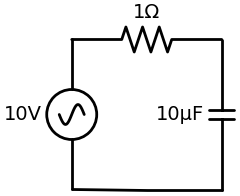

In [3]:
import schemdraw
import schemdraw.elements as elm

with schemdraw.Drawing():
    elm.Resistor().right().label('1Ω')
    elm.Capacitor().down().label('10μF')
    elm.Line().left()
    elm.SourceSin().up().label('10V')


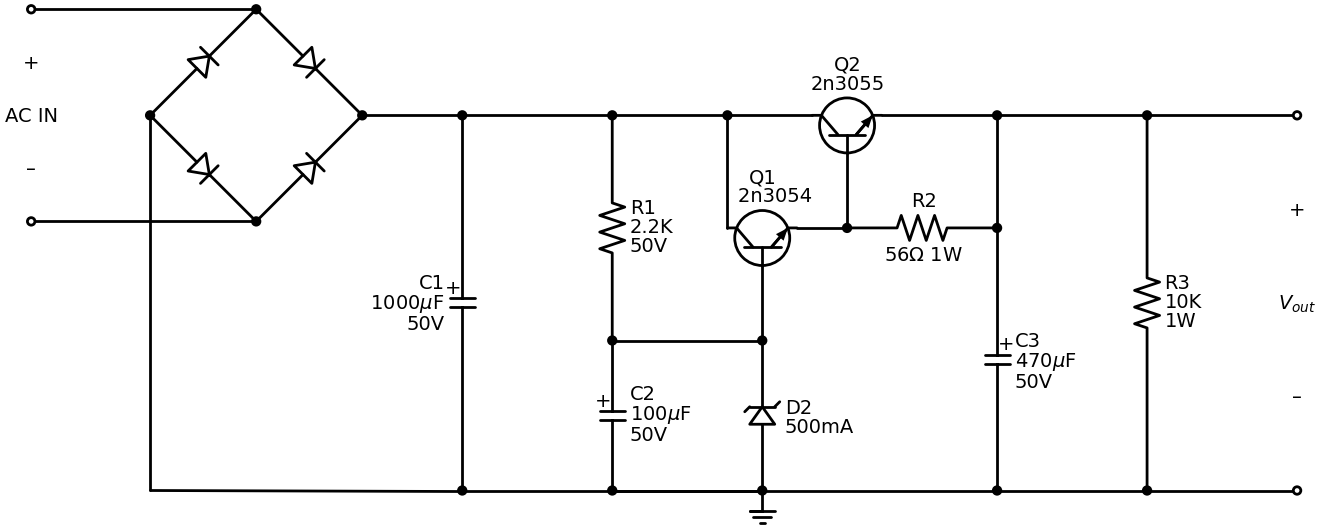

In [4]:
import schemdraw
import schemdraw.elements as elm

with schemdraw.Drawing() as d:
    d.config(inches_per_unit=.5, unit=3)
    D = elm.Rectifier()
    elm.Line().left(d.unit*1.5).at(D.N).dot(open=True).idot()
    elm.Line().left(d.unit*1.5).at(D.S).dot(open=True).idot()
    G = elm.Gap().toy(D.N).label(['–', 'AC IN', '+'])

    top = elm.Line().right(d.unit*3).at(D.E).idot()
    Q2 = elm.BjtNpn(circle=True).up().anchor('collector').label('Q2\n2n3055')
    elm.Line().down(d.unit/2).at(Q2.base)
    Q2b = elm.Dot()
    elm.Line().left(d.unit/3)
    Q1 = elm.BjtNpn(circle=True).up().anchor('emitter').label('Q1\n    2n3054')
    elm.Line().at(Q1.collector).toy(top.center).dot()

    elm.Line().down(d.unit/2).at(Q1.base).dot()
    elm.Zener().down().reverse().label('D2\n500mA', loc='bot').dot()
    G = elm.Ground()
    elm.Line().left().dot()
    elm.Capacitor(polar=True).up().reverse().label('C2\n100$\\mu$F\n50V', loc='bot').dot()
    elm.Line().right().hold()
    elm.Resistor().toy(top.end).label('R1\n2.2K\n50V', loc='bot').dot()

    d.move(dx=-d.unit, dy=0)
    elm.Capacitor(polar=True).toy(G.start).flip().label('C1\n 1000$\\mu$F\n50V').dot().idot()
    elm.Line().at(G.start).tox(D.W)
    elm.Line().toy(D.W).dot()

    elm.Resistor().right().at(Q2b.center).label('R2').label('56$\\Omega$ 1W', loc='bot').dot()
    d.push()
    elm.Line().toy(top.start).dot()
    elm.Line().tox(Q2.emitter)
    d.pop()
    elm.Capacitor(polar=True).toy(G.start).label('C3\n470$\\mu$F\n50V', loc='bot').dot()
    elm.Line().tox(G.start).hold()
    elm.Line().right().dot()
    elm.Resistor().toy(top.center).label('R3\n10K\n1W', loc='bot').dot()
    elm.Line().left().hold()
    elm.Line().right()
    elm.Dot(open=True)
    elm.Gap().toy(G.start).label(['+', '$V_{out}$', '–'])
    elm.Dot(open=True)
    elm.Line().left()

## lcapy 
Draw and analysis circuit [lcapy_sim](https://lcapy.readthedocs.io/en/latest/)

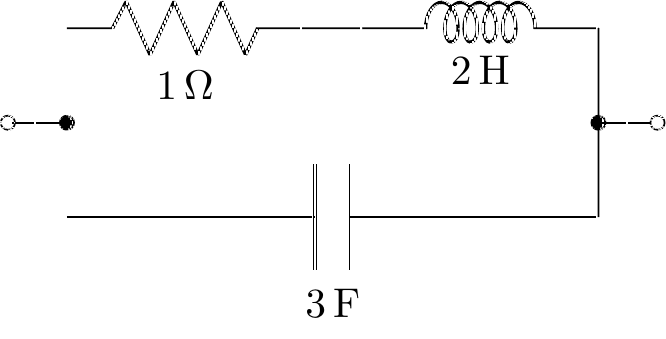

In [1]:
from lcapy import R, C, L
((R(1) + L(2)) | C(3)).draw()

### Note
The circuit includes a series resistor and inductor, which are connected in parallel with a capacitor 

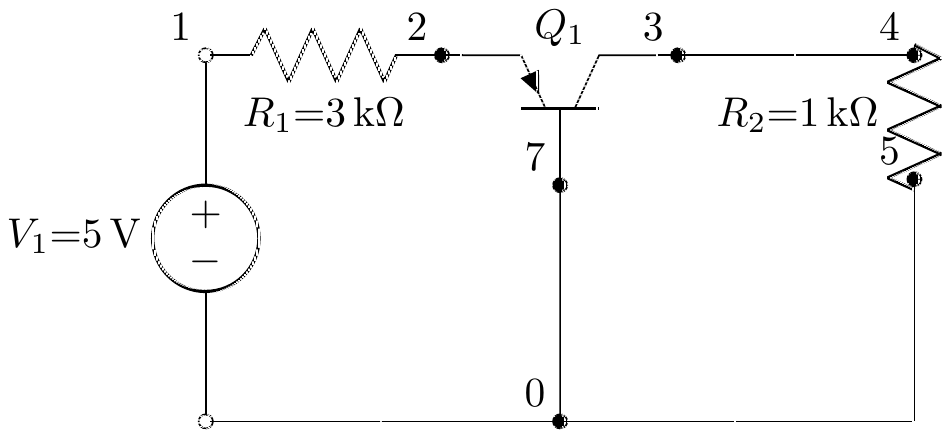

In [64]:
from lcapy import Circuit
cct = Circuit("""

Q1 3 7 2 pnp; up
W 7 0 ;down              
R1 1 2 3e3;right
R2 4 5 1e3;down=0.5
W 5 0_4;down             
P1 1 0_1;down=0.5
W 0_1 0;right
W 0 0_4;right
W 3 4;right
V1 1 0_1 5;down =1.5           
""")
cct.draw()

## PySpice Installation
pip3 install pyspice
download ngspice-43_64.7z then add to windows path ngspice.exe

In [2]:
import PySpice.Spice.Simulation as simulation
print(dir(simulation))

['ACAnalysisParameters', 'AcSensitivityAnalysisParameters', 'AnalysisParameters', 'CircuitSimulation', 'CircuitSimulator', 'ConfigInstall', 'DCAnalysisParameters', 'DcSensitivityAnalysisParameters', 'DistortionAnalysisParameters', 'MeasureParameters', 'NoiseAnalysisParameters', 'OperatingPointAnalysisParameters', 'PoleZeroAnalysisParameters', 'TransferFunctionAnalysisParameters', 'TransientAnalysisParameters', 'Unit', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', '_module_logger', 'as_A', 'as_Degree', 'as_Hz', 'as_V', 'as_s', 'join_dict', 'join_list', 'logging', 'os', 'str_spice', 'u_Degree']


C:\Users\Dr\AppData\Local\Temp\ipykernel_6944\75300024.py:45: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


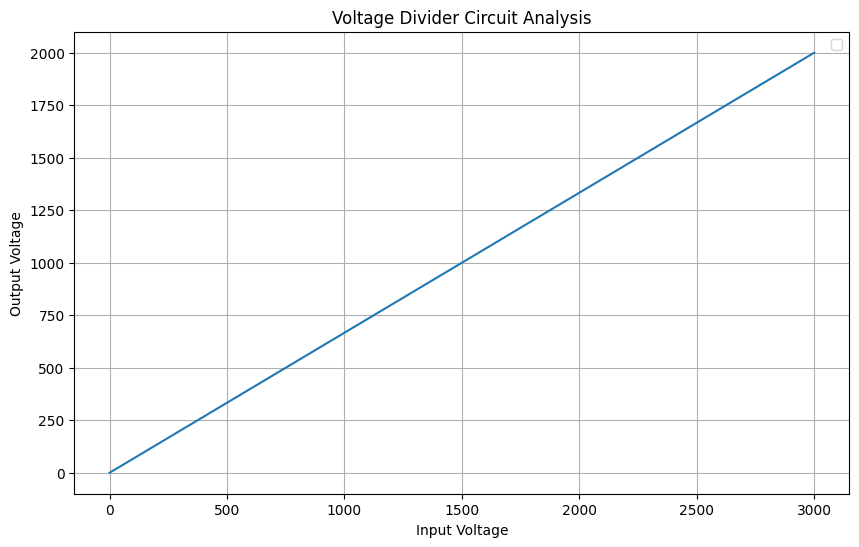

In [1]:
from PySpice.Spice.Netlist import Circuit
from PySpice.Spice.HighLevelElement import SinusoidalVoltageSource 
from PySpice.Unit import *
import matplotlib.pyplot as plt
from PySpice.Spice.Library import SpiceLibrary
import numpy as np


dc_offset = 1@u_V
ac_amplitude = 100@u_mV

# Create a circuit
circuit = Circuit('RC Circuit')
#SinusoidalVoltageSource('input', circuit.gnd, 'input',circuit.gnd)
#source = circuit.V('input', 'in', circuit.gnd, dc_offset)
#SinusoidalVoltageSource('input','input',circuit.gnd)
#AcLine()
#('input', circuit.gnd, 'L', rms_voltage=230@u_V, frequency=50@u_Hz)
source=circuit.V(50, 'input', circuit.gnd, 1000 )#@ u_V)
circuit.R(1, 'input', 'output', 1 @ u_kΩ)
circuit.R(2, 'output', circuit.gnd, 2 @ u_kΩ)
#circuit.SinusoidalVoltageSource('input', 'input', circuit.gnd, amplitude=220, frequency=50)
# Simulate the circuit

InputData=np.array([])
OutputData=np.array([])

for voltage in (0,100,3000):
    source.dc_value = voltage
    simulator = circuit.simulator(temperature=25, nominal_temperature=25)
    analysis = simulator.operating_point()
    #analysis = simulator.transient(step_time=0.01 @ u_ms, end_time=50 @ u_ms)
    InputData=np.append(InputData,analysis['input'])
    OutputData=np.append(OutputData,analysis['output'])

# Plot the results
plt.figure(figsize=(10, 6))

plt.plot(InputData,OutputData)

# Add labels and legend
plt.xlabel('Input Voltage')
plt.ylabel('Output Voltage')
plt.title('Voltage Divider Circuit Analysis')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


In [1]:
import PySpice.Logging.Logging as Logging
logger = Logging.setup_logging()


import numpy as np


from PySpice.Spice.Netlist import Circuit
from PySpice.Unit import *


circuit = Circuit("Millman's theorem")

number_of_branches = 3
for i in range(1, number_of_branches +1):
    circuit.V('input%u' % i, i, circuit.gnd, i@u_V)
    circuit.R(i, i, 'A', i@u_kΩ)

simulator = circuit.simulator(temperature=25, nominal_temperature=25)
analysis = simulator.operating_point()

node_A = analysis.A
print('Node {}: {:5.2f} V'.format(str(node_A), float(node_A)))

Node a:  1.64 V


C:\Users\Dr\AppData\Local\Temp\ipykernel_18812\1259790737.py:23: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Node {}: {:5.2f} V'.format(str(node_A), float(node_A)))
